In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
a = pd.read_excel("asa.xlsx")
b = a[['Age Groups','Total Population','Total Immigration','Total Emigration']]
a

Age Groups  Total Population  Total Immigration  Male Immigrants  \
0       Total          85279553             494052           261201   
1         0-4           5663620              29205            14972   
2         5-9           6635077              27324            14043   
3       10-14           6436414              22980            12018   
4       15-19           6315109              43455            24251   
5       20-24           6634708              57731            31154   
6       25-29           6553169              60040            31916   
7       30-34           6315047              55974            29754   
8       35-39           6366741              47143            25126   
9       40-44           6606029              35689            19252   
10      45-49           5763534              28130            15089   
11      50-54           5054624              24747            12815   
12      55-59           4627141              21045            10731   
13      60-64           3856671              16529             8265   
14      65-69           3185289              12024             6064   
15      70-74           2264119               6417             2959   
16        75+           3002261               5619             2792   

    Female Immigrants  Total Emigration  Male Emigrants  Female Emigrants  
0              232851            466914          260245            206669  
1               14233             14538            7442              7096  
2               13281             23939           12343             11596  
3               10962             21805           11185             10620  
4               19204             25470           14766             10704  
5               26577             59841           37894             21947  
6               28124             73838           44751             29087  
7               26220             62742           35558             27184  
8               22017             49414           27403             22011  
9               16437             38023           20752             17271  
10              13041             28346           15138             13208  
11              11932             22418           11346             11072  
12              10314             16961            8097              8864  
13               8264             12145            5445              6700  
14               5960              8207            3872              4335  
15               3458              4618            2113              2505  
16               2827              4609            2140              2469

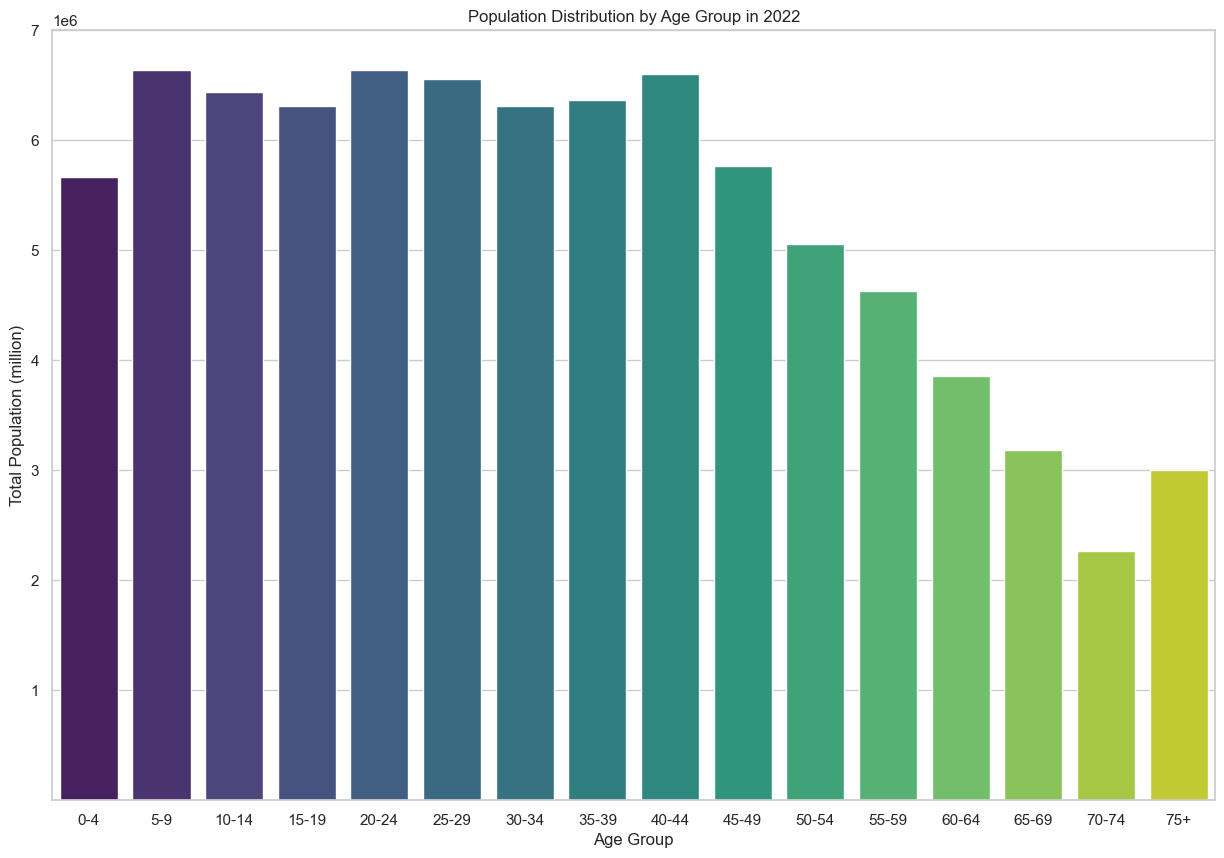

In [3]:
plt.figure(figsize=(15, 10))
sn.set_theme(style='whitegrid')
sn.barplot(x='Age Groups', data=b[['Age Groups', 'Total Population']].drop(0), 
           y='Total Population', palette='viridis', legend=False, hue='Age Groups'
)
plt.xlabel('Age Group')
plt.ylabel('Total Population (million)')
plt.yticks([1000000,2000000,3000000,4000000,5000000,6000000,7000000])
plt.title('Population Distribution by Age Group in 2022')
plt.show()


Text(0.5, 1.0, 'Distribution Among Genders')

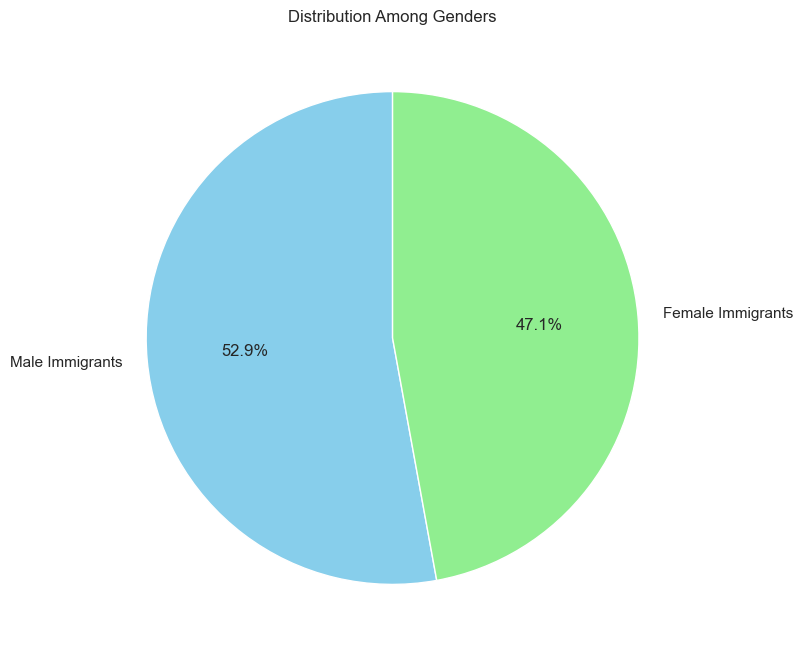

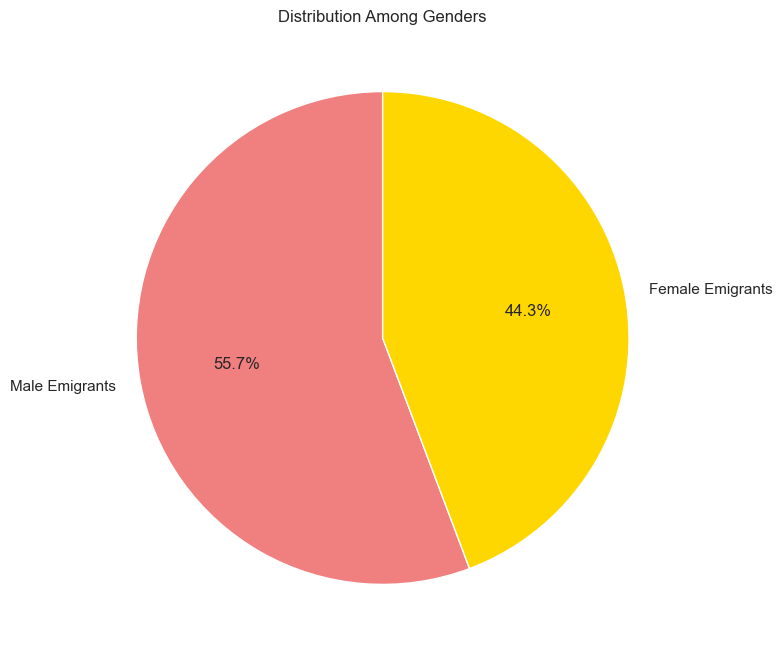

In [4]:
plt.figure(figsize=(8,8))
plt.pie(x=a[['Male Immigrants','Female Immigrants']].loc[0], 
        labels=['Male Immigrants','Female Immigrants'], autopct='%1.1f%%', 
        startangle=90, colors=['skyblue', 'lightgreen']
)
plt.title('Distribution Among Genders')

plt.figure(figsize=(8,8))
plt.pie(x=a[['Male Emigrants','Female Emigrants']].loc[0], 
        labels=['Male Emigrants','Female Emigrants'], autopct='%1.1f%%', 
        startangle=90, colors=['lightcoral', 'gold']
)
plt.title('Distribution Among Genders')


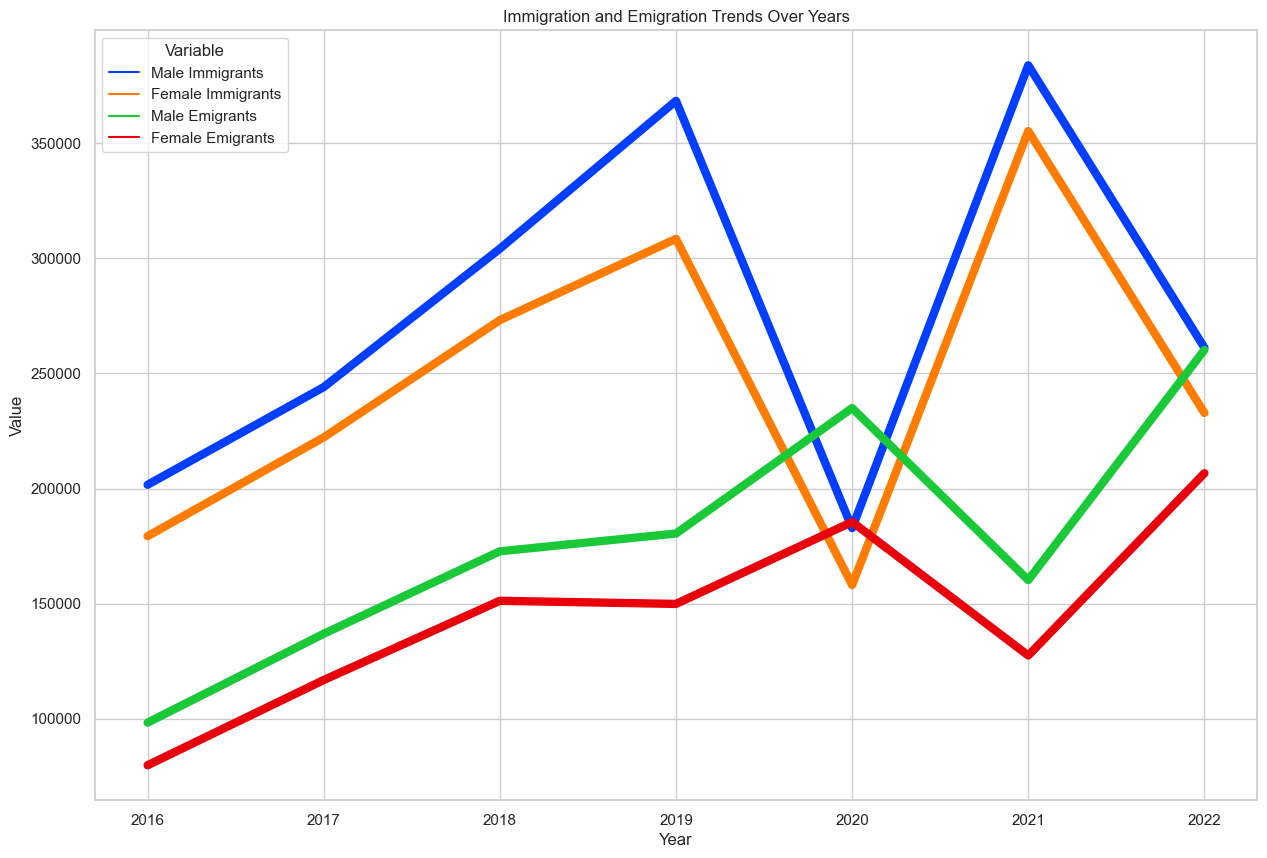

In [5]:
c = pd.read_excel("asa2.xlsx")
first_appearance_rows = c.drop_duplicates('Year', keep='first', inplace=False)
far_long = pd.melt(first_appearance_rows[['Year','Male Immigrants', 
        'Female Immigrants', 'Male Emigrants', 'Female Emigrants']],
        id_vars='Year', var_name='Variable', value_name='Value'
)
sn.set_theme(style='whitegrid')
plt.figure(figsize=(15,10))
sn.lineplot(x='Year', y='Value', hue='Variable', data=far_long, palette='bright')
plt.xlabel('Year')
plt.ylabel('Value')
for i in plt.gca().lines:
    i.set_linewidth(6)
plt.title('Immigration and Emigration Trends Over Years')
plt.show()

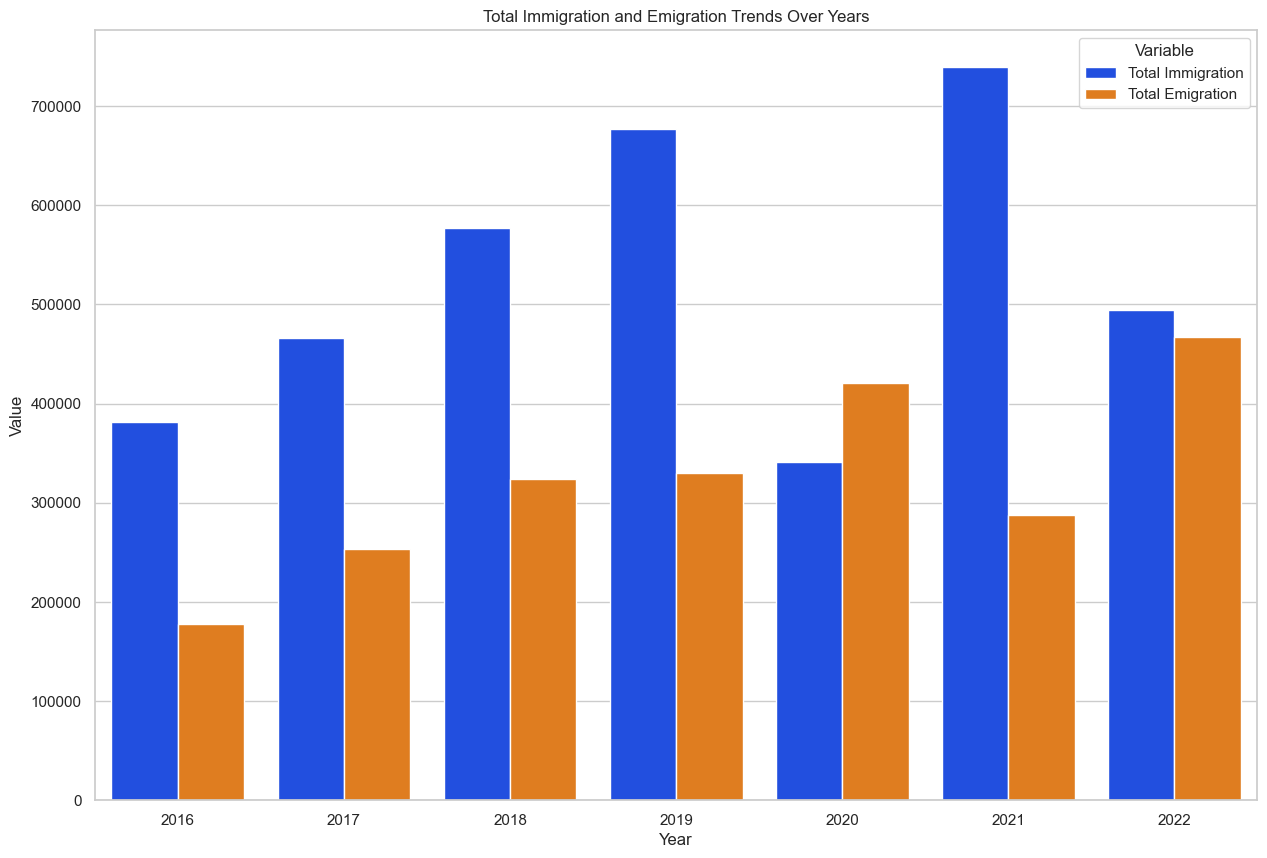

In [6]:
far_long = pd.melt(first_appearance_rows[['Year','Total Immigration', 
        'Total Emigration']],
        id_vars='Year', var_name='Variable', value_name='Value'
)
sn.set_theme(style='whitegrid')
plt.figure(figsize=(15,10))
sn.barplot(x='Year', y='Value', hue='Variable', data=far_long, palette='bright')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Total Immigration and Emigration Trends Over Years')
plt.show()

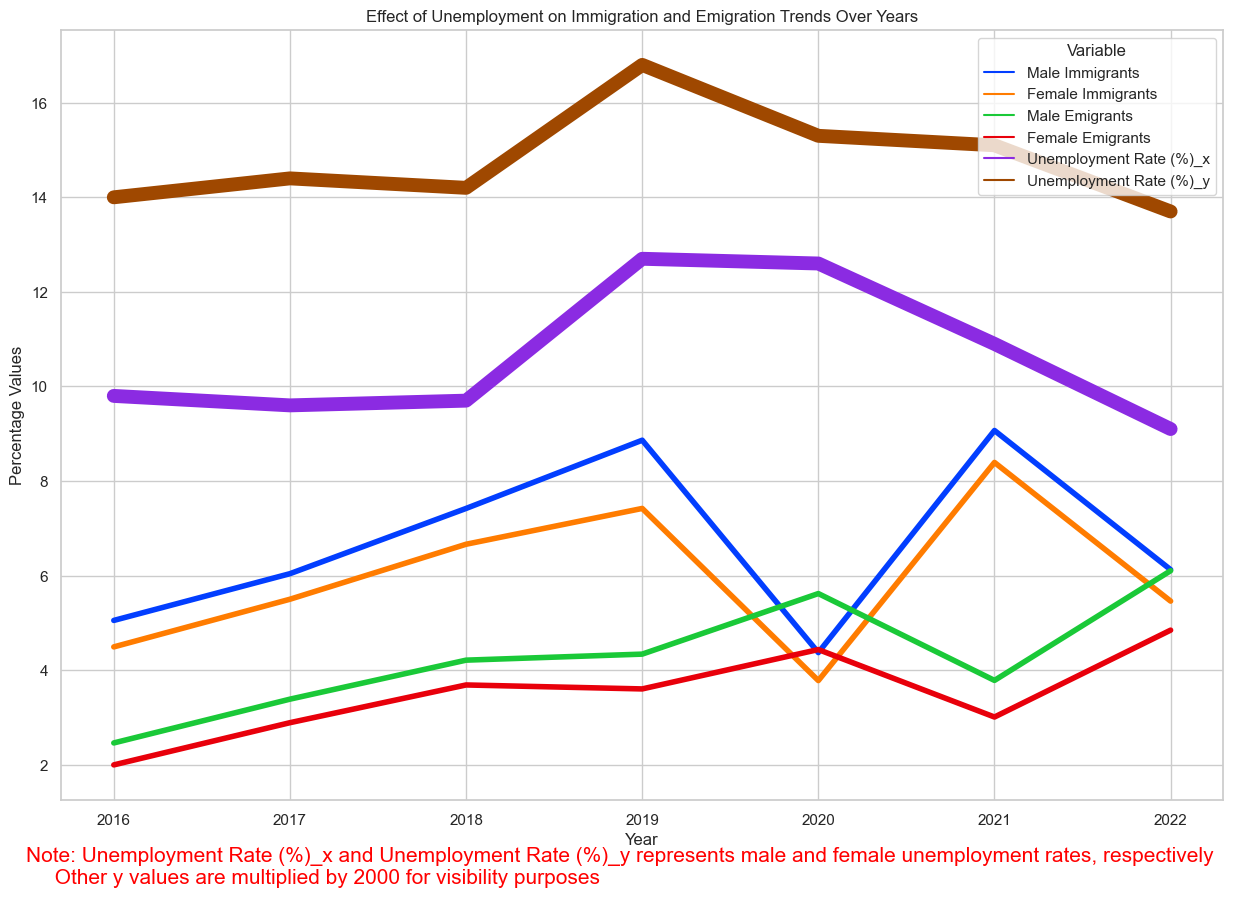

In [7]:
unemp = pd.read_excel("Unemployment rate over years.xls")
unemp_male = unemp[unemp['Age Group and Gender'] == '(15-64) ve Erkek']
unemp_female = unemp[unemp['Age Group and Gender'] == '(15-64) ve Kadın']
unemp_merged = pd.merge(first_appearance_rows, unemp_male, on='Year')
unemp_merged = pd.merge(unemp_merged, unemp_female, on='Year')

normalized_unemp_merged = unemp_merged.copy()
columns_to_percentage = ['Male Immigrants', 'Female Immigrants','Male Emigrants','Female Emigrants'] 
normalized_unemp_merged[columns_to_percentage] = (normalized_unemp_merged[columns_to_percentage
    ].div(normalized_unemp_merged['Total Population'], axis=0)) * 2000

app_unemp_merged = normalized_unemp_merged[['Year','Male Immigrants', 'Female Immigrants',
'Male Emigrants', 'Female Emigrants', 'Unemployment Rate (%)_x','Unemployment Rate (%)_y']
]
#app_unempmerged = unemp_merged[['Year','Male Immigrants', 'Female Immigrants',
#'Male Emigrants', 'Female Emigrants', 'Unemployment Rate (%)_x','Unemployment Rate (%)_y']
#].apply(lambda x: x.apply(lambda y: np.log(y)))

merged_long = pd.melt(app_unemp_merged[['Year','Male Immigrants', 
        'Female Immigrants', 'Male Emigrants', 'Female Emigrants', 'Unemployment Rate (%)_x','Unemployment Rate (%)_y']],
        id_vars=['Year'], 
        var_name='Variable', value_name='Value'
)
sn.set_theme(style='whitegrid')
plt.figure(figsize=(15,10))
sn.lineplot(x='Year', y='Value', hue='Variable', data=merged_long, 
            palette='bright', hue_order=['Male Immigrants', 'Female Immigrants', 
            'Male Emigrants', 'Female Emigrants', 'Unemployment Rate (%)_x','Unemployment Rate (%)_y'], 
            )
plt.xlabel('Year')
plt.ylabel('Percentage Values')
plt.title('Effect of Unemployment on Immigration and Emigration Trends Over Years')
plt.text(2015.5, -0.5, 'Note: Unemployment Rate (%)_x and Unemployment Rate (%)_y represents male and female unemployment rates, respectively\n     Other y values are multiplied by 2000 for visibility purposes', fontsize=15, color='red')
plt.gca().lines[4].set_linewidth(10)
plt.gca().lines[5].set_linewidth(10)
plt.gca().lines[0].set_linewidth(4)
plt.gca().lines[1].set_linewidth(4)
plt.gca().lines[2].set_linewidth(4)
plt.gca().lines[3].set_linewidth(4)
plt.show()

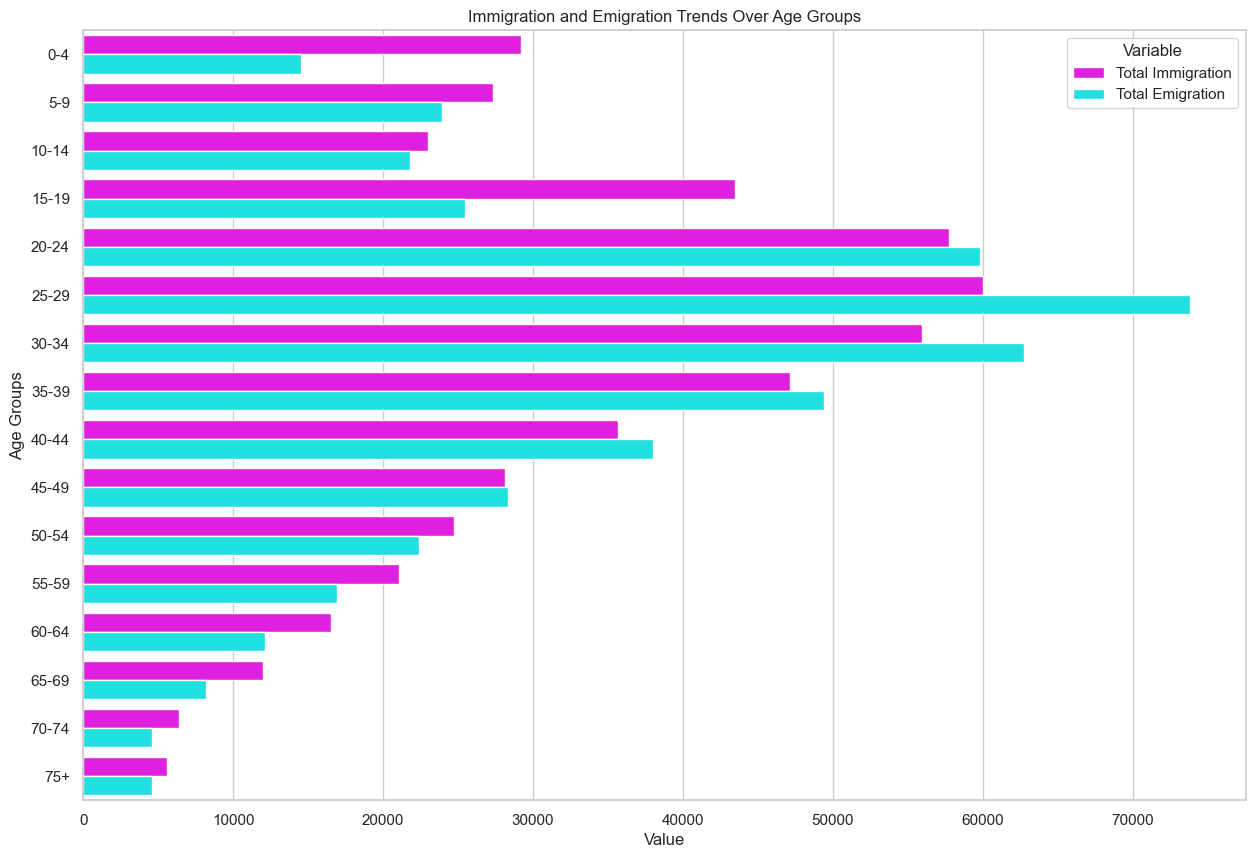

In [8]:
a_long = pd.melt(a[['Age Groups','Total Immigration',
    'Total Emigration']].drop(0), id_vars='Age Groups', var_name='Variable',
    value_name='Value'
    )
plt.figure(figsize=(15,10))
sn.barplot(x='Value', y='Age Groups', hue='Variable', 
           data=a_long, palette=['magenta','cyan'],
           )
sn.set_theme(style='whitegrid')
plt.xlabel('Value')
plt.ylabel('Age Groups')
plt.title('Immigration and Emigration Trends Over Age Groups')
plt.show()


In [9]:
a

Age Groups  Total Population  Total Immigration  Male Immigrants  \
0       Total          85279553             494052           261201   
1         0-4           5663620              29205            14972   
2         5-9           6635077              27324            14043   
3       10-14           6436414              22980            12018   
4       15-19           6315109              43455            24251   
5       20-24           6634708              57731            31154   
6       25-29           6553169              60040            31916   
7       30-34           6315047              55974            29754   
8       35-39           6366741              47143            25126   
9       40-44           6606029              35689            19252   
10      45-49           5763534              28130            15089   
11      50-54           5054624              24747            12815   
12      55-59           4627141              21045            10731   
13      60-64           3856671              16529             8265   
14      65-69           3185289              12024             6064   
15      70-74           2264119               6417             2959   
16        75+           3002261               5619             2792   

    Female Immigrants  Total Emigration  Male Emigrants  Female Emigrants  
0              232851            466914          260245            206669  
1               14233             14538            7442              7096  
2               13281             23939           12343             11596  
3               10962             21805           11185             10620  
4               19204             25470           14766             10704  
5               26577             59841           37894             21947  
6               28124             73838           44751             29087  
7               26220             62742           35558             27184  
8               22017             49414           27403             22011  
9               16437             38023           20752             17271  
10              13041             28346           15138             13208  
11              11932             22418           11346             11072  
12              10314             16961            8097              8864  
13               8264             12145            5445              6700  
14               5960              8207            3872              4335  
15               3458              4618            2113              2505  
16               2827              4609            2140              2469

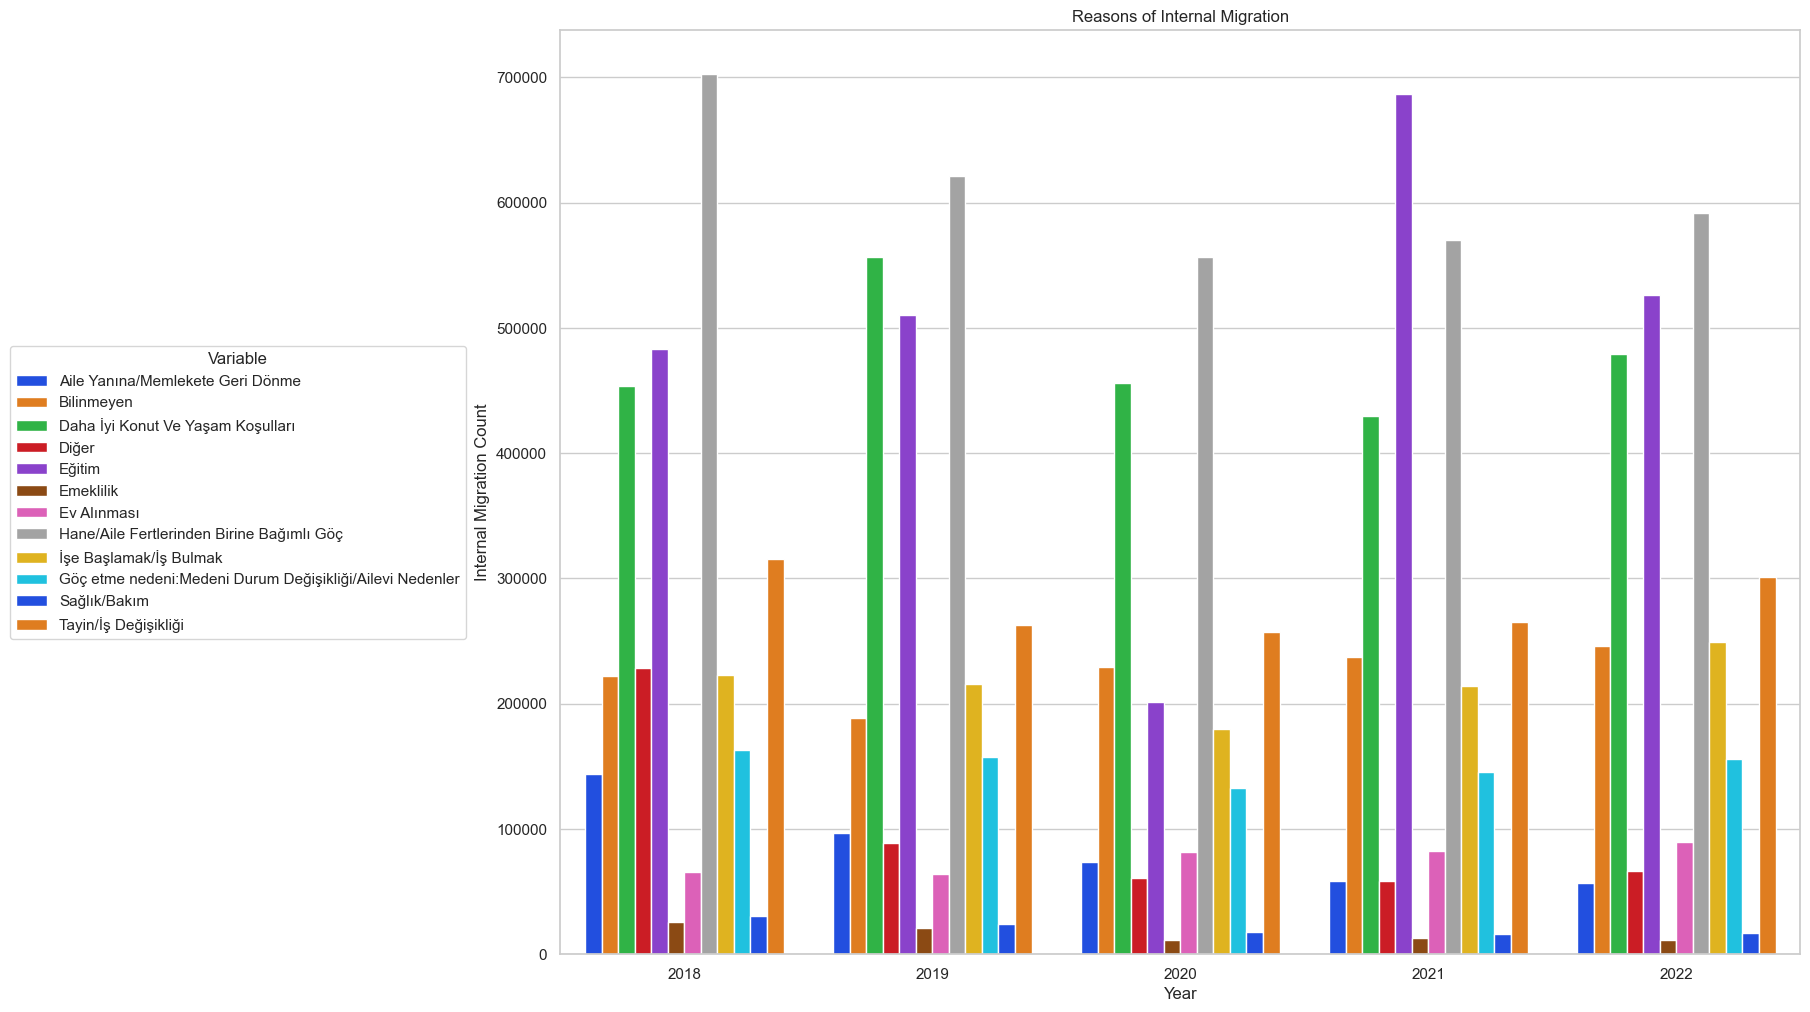

In [10]:
internal_migration = pd.read_excel("Reasons of internal migration.xls")
im_long = pd.melt(internal_migration, id_vars='Year', var_name='Variable', value_name='Value')
plt.figure(figsize=(16, 12))
ax = sn.barplot(x='Year', y='Value', hue='Variable', data=im_long, palette='bright')
sn.move_legend(ax,loc='center left', bbox_to_anchor=(-0.45,0.5))
plt.xlabel('Year')
plt.ylabel('Internal Migration Count')
plt.title('Reasons of Internal Migration')
plt.show()

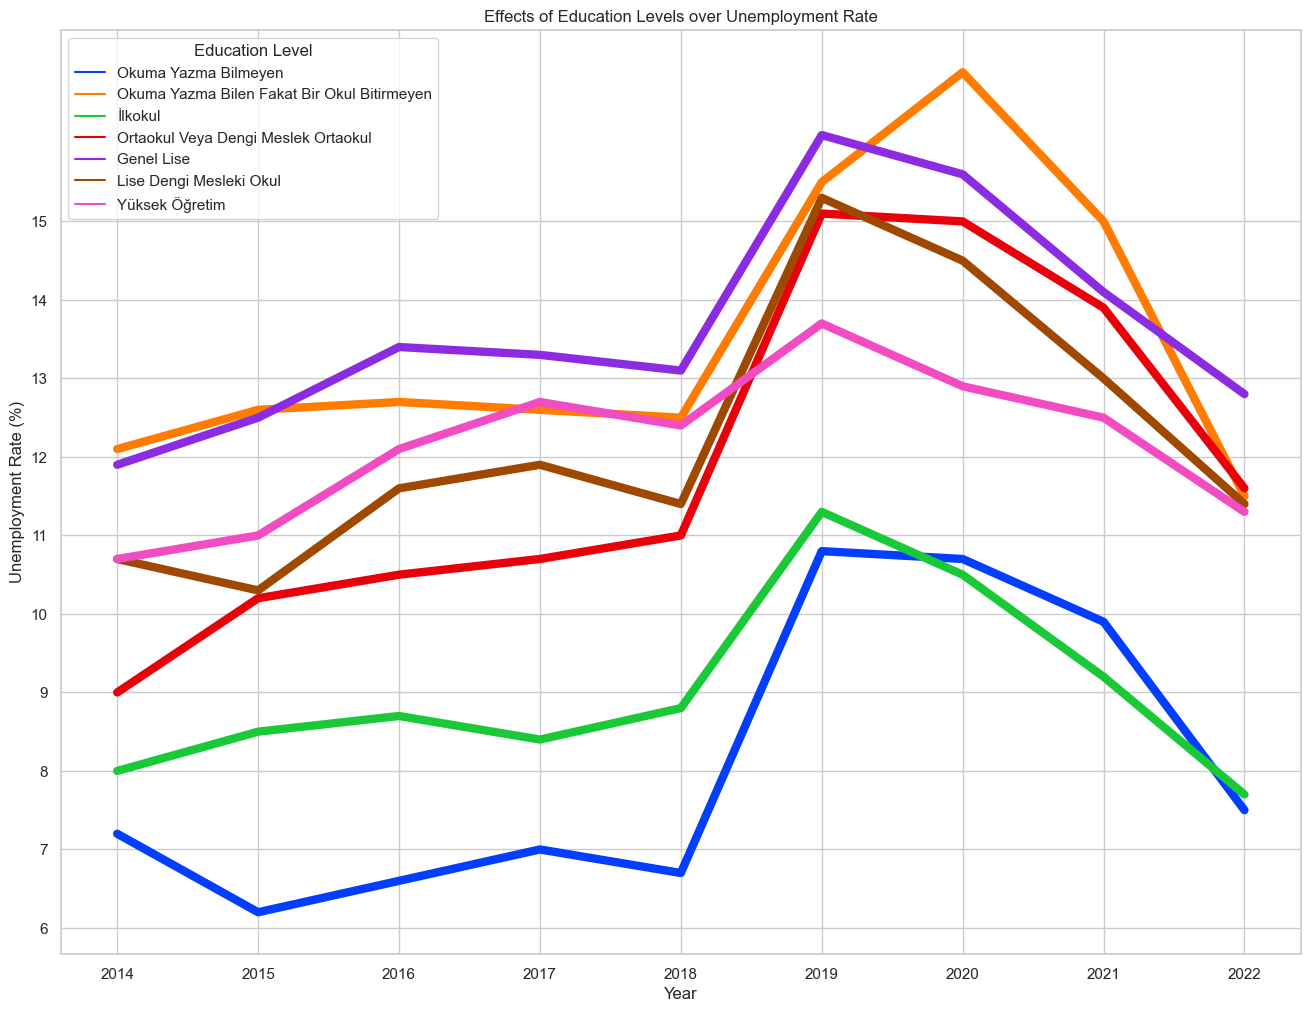

In [11]:
edu_migration = pd.read_excel("Unemployment rate over gender and education.xls")
#edu_migration_long = pd.melt(edu_migration, id_vars='Year', var_name='Variable', value_name='Value')
plt.figure(figsize=(16,12))
sn.lineplot(x='Year', y='Unemployment Rate (%)', hue='Education Level', data=edu_migration, palette='bright')
#sn.move_legend(ax,loc='center left', bbox_to_anchor=(-0.45,0.5))
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Effects of Education Levels over Unemployment Rate')
for i in plt.gca().lines:
    i.set_linewidth(6)
plt.yticks(range(6,16,1))
plt.show()

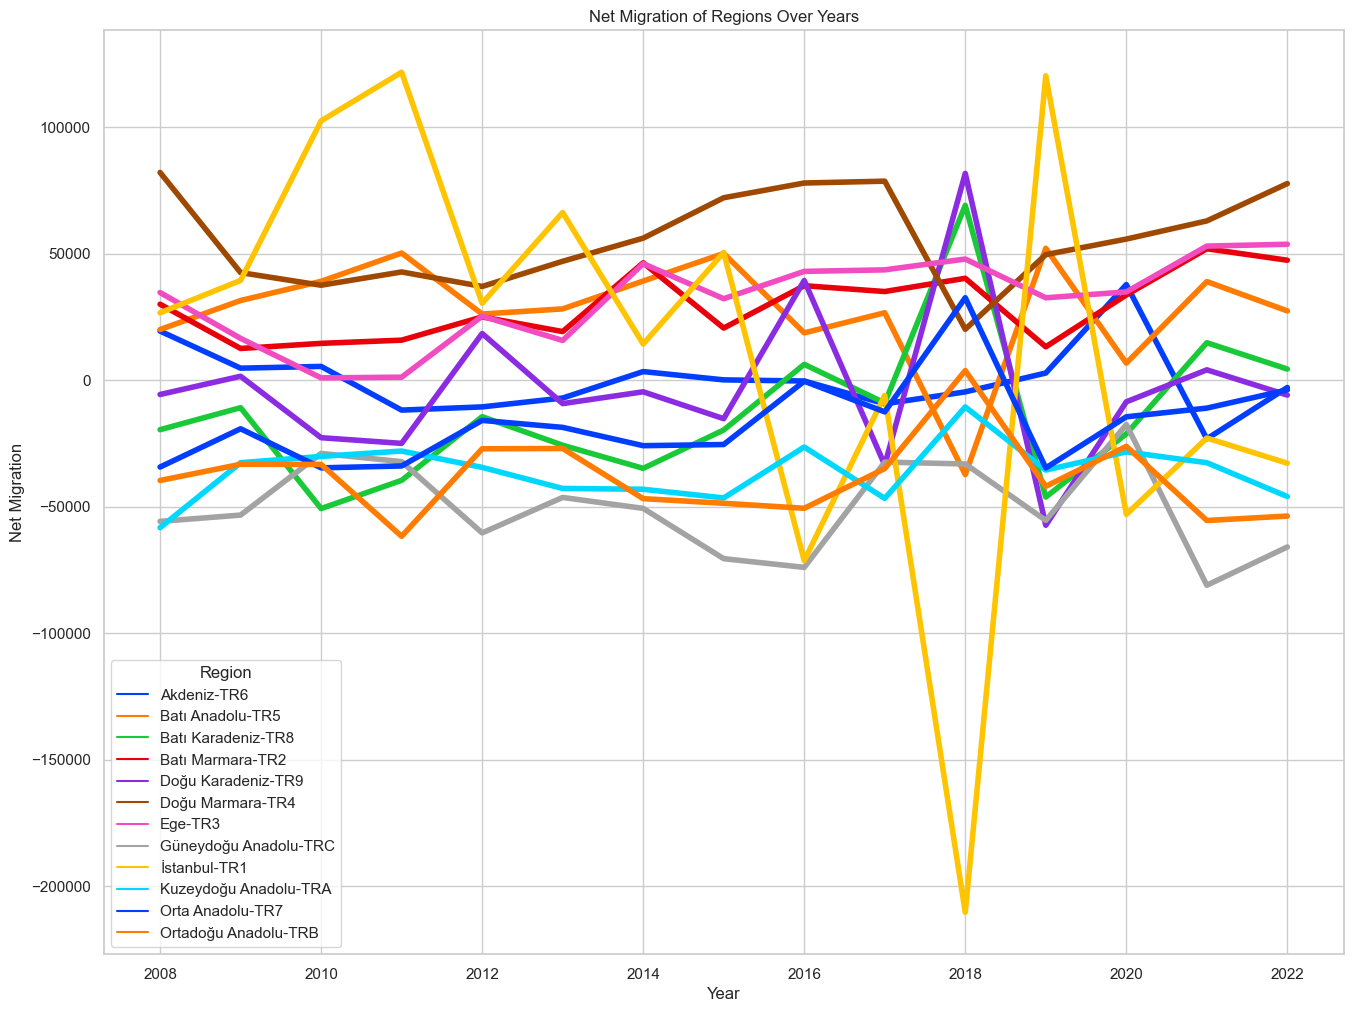

In [12]:
net_mig = pd.read_excel("Net Migration of Regions.xls")
plt.figure(figsize=(16,12))
sn.lineplot(x='Year', y='Net Migration', hue='Region', data=net_mig, palette='bright')
plt.xlabel('Year')
plt.ylabel('Net Migration')
plt.title('Net Migration of Regions Over Years')
for i in plt.gca().lines:
    i.set_linewidth(4)
plt.show()

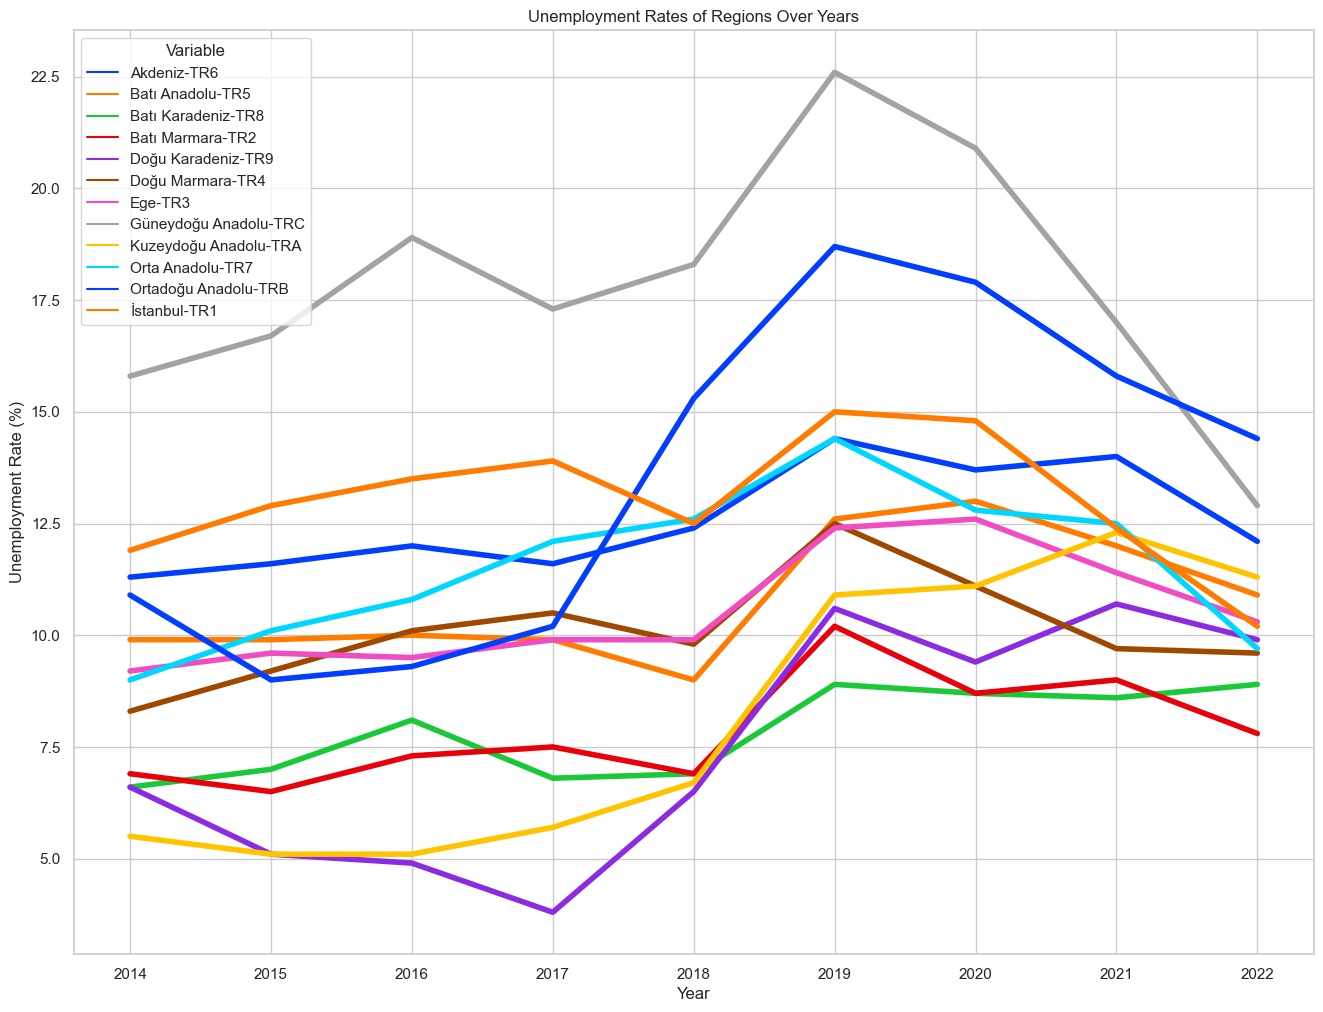

In [13]:
regional_unemp = pd.read_excel("Unemployment Rates of Regions over Years.xls")
regional_unemp_melted = pd.melt(regional_unemp, id_vars='Year', value_vars=['Akdeniz-TR6',
'Batı Anadolu-TR5', 'Batı Karadeniz-TR8', 'Batı Marmara-TR2','Doğu Karadeniz-TR9','Doğu Marmara-TR4',
'Ege-TR3','Güneydoğu Anadolu-TRC', 'Kuzeydoğu Anadolu-TRA', 'Orta Anadolu-TR7', 'Ortadoğu Anadolu-TRB',
'İstanbul-TR1'], var_name='Variable', value_name='Value'
)
plt.figure(figsize=(16, 12))
ax = sn.lineplot(x='Year', y='Value', hue='Variable', data=regional_unemp_melted, palette='bright')
sn.move_legend(ax,loc='upper left')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rates of Regions Over Years')
for i in plt.gca().lines:
    i.set_linewidth(4)
plt.show()

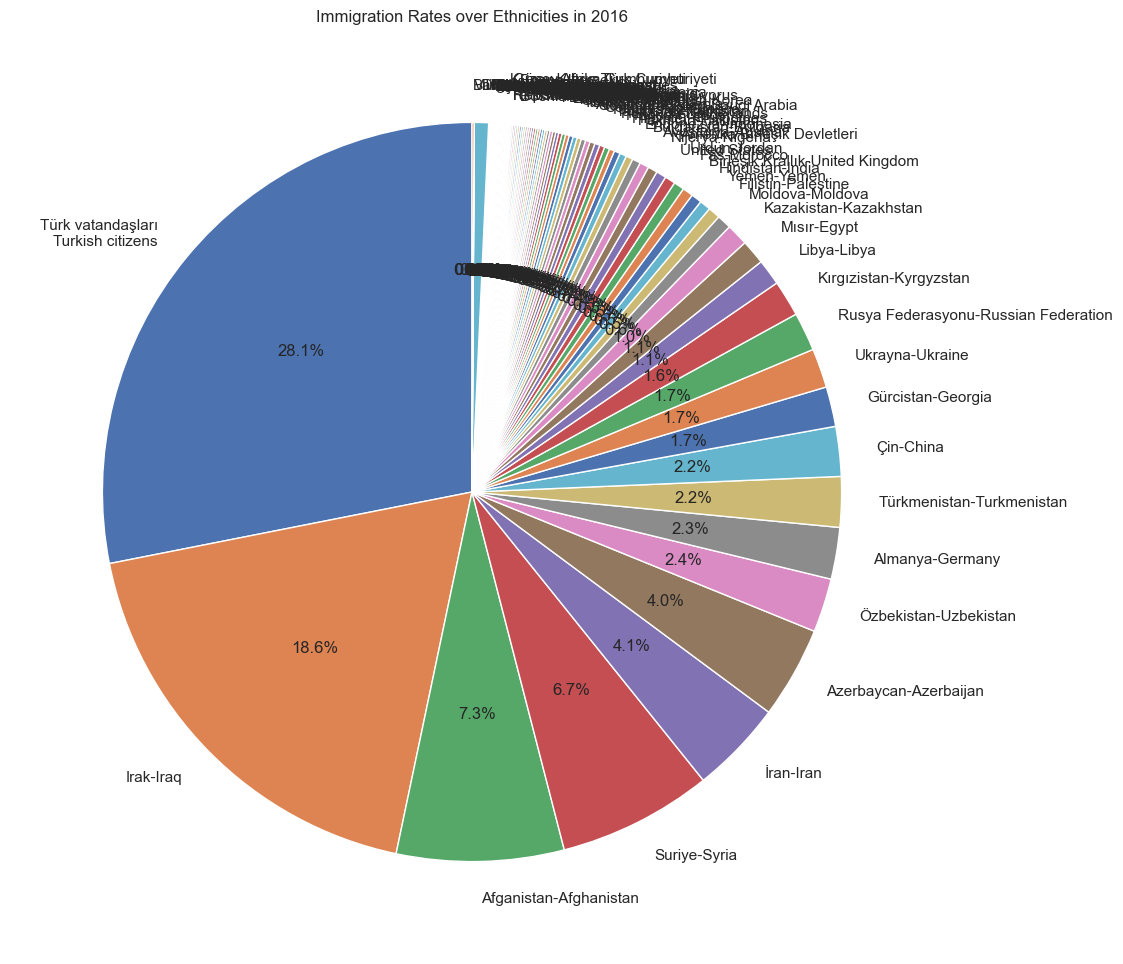

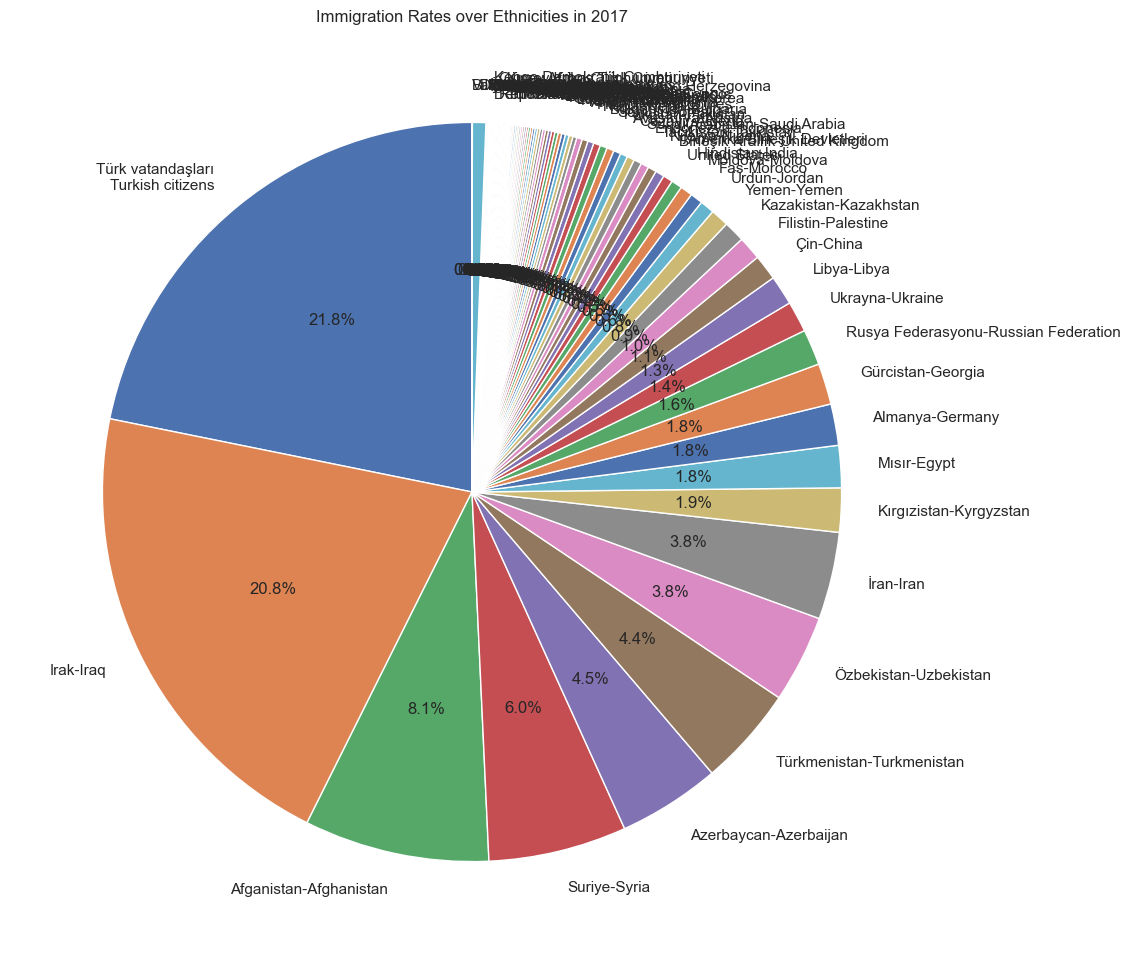

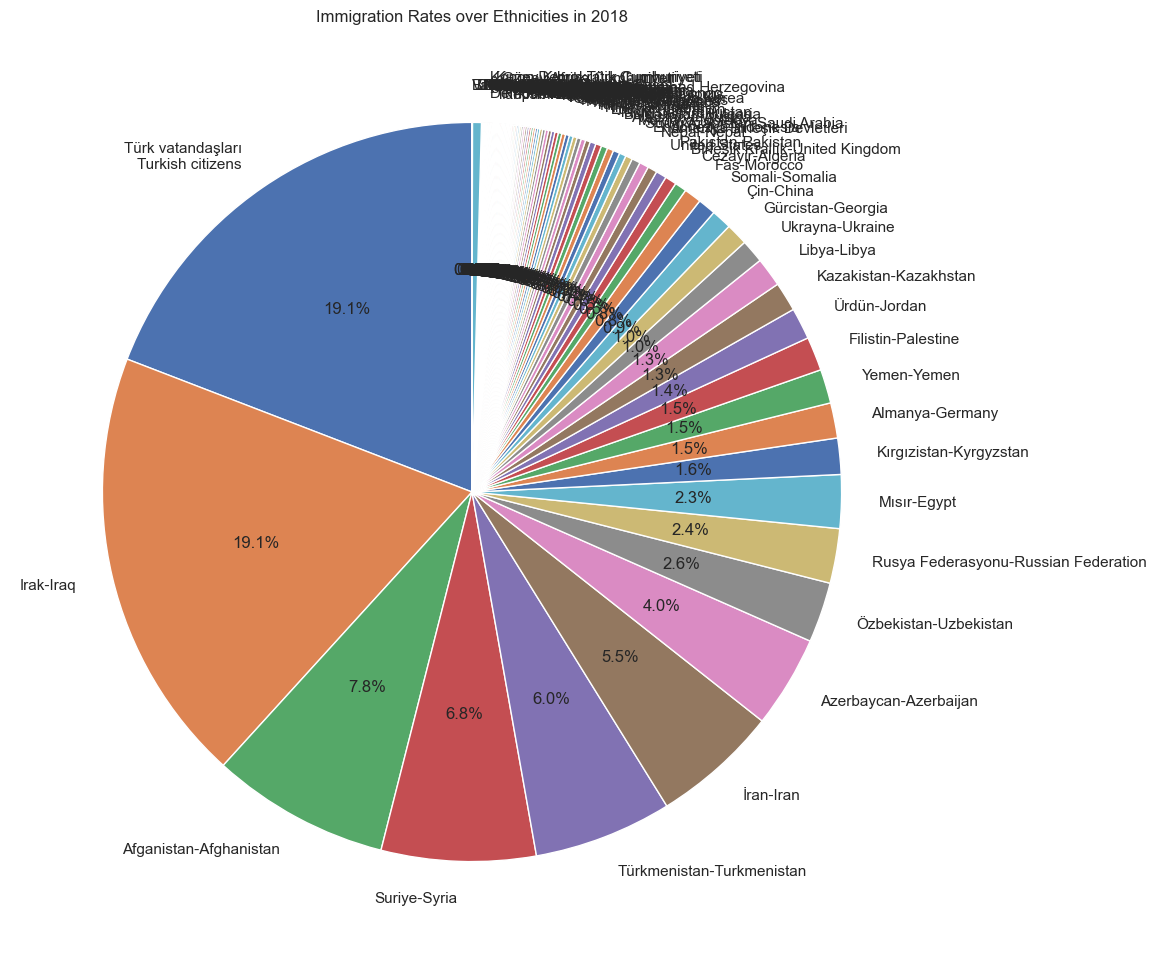

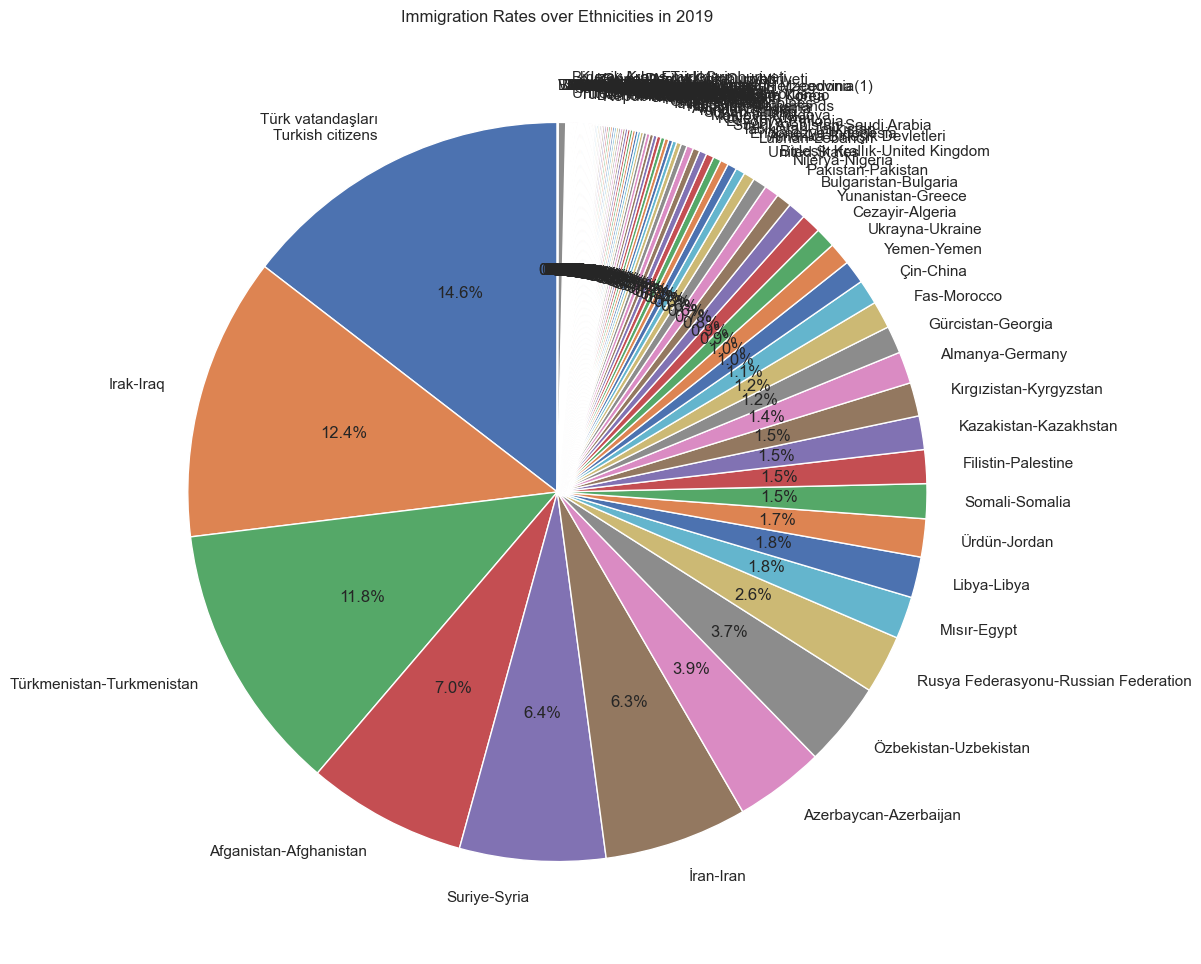

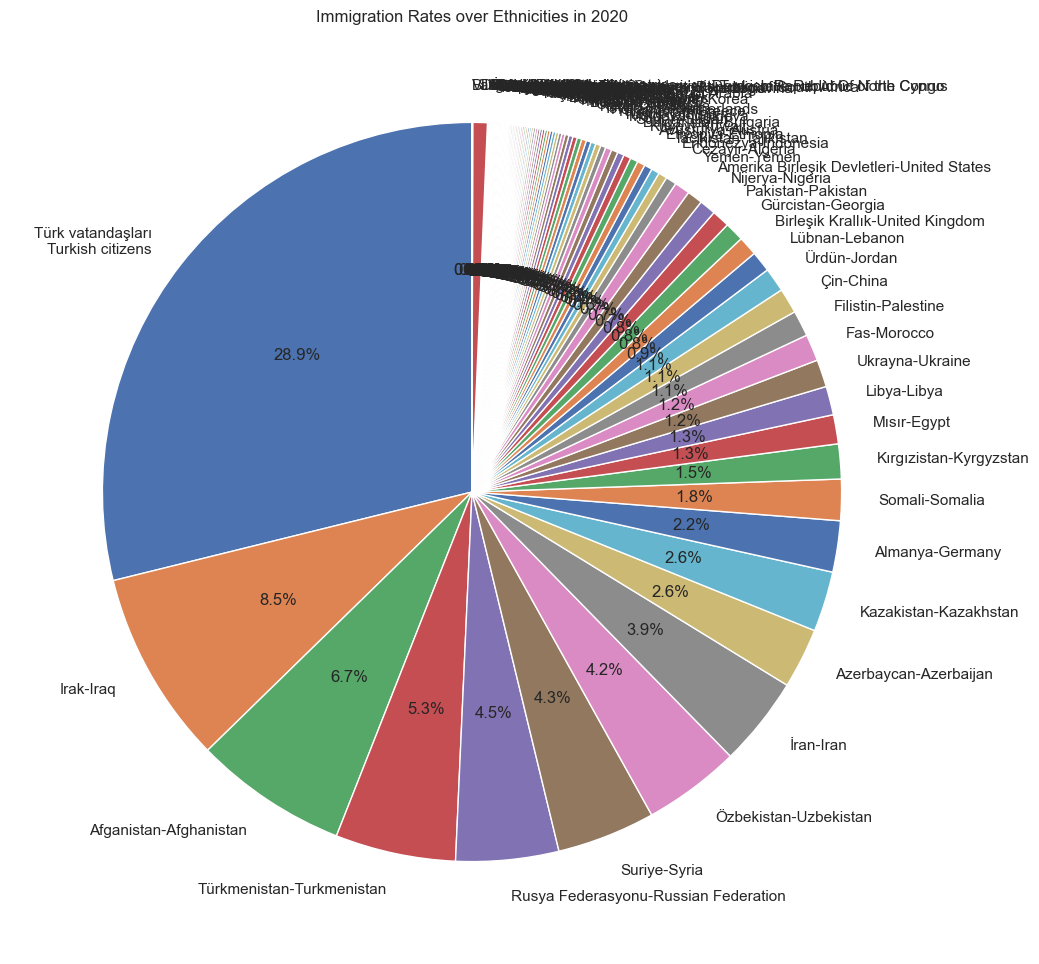

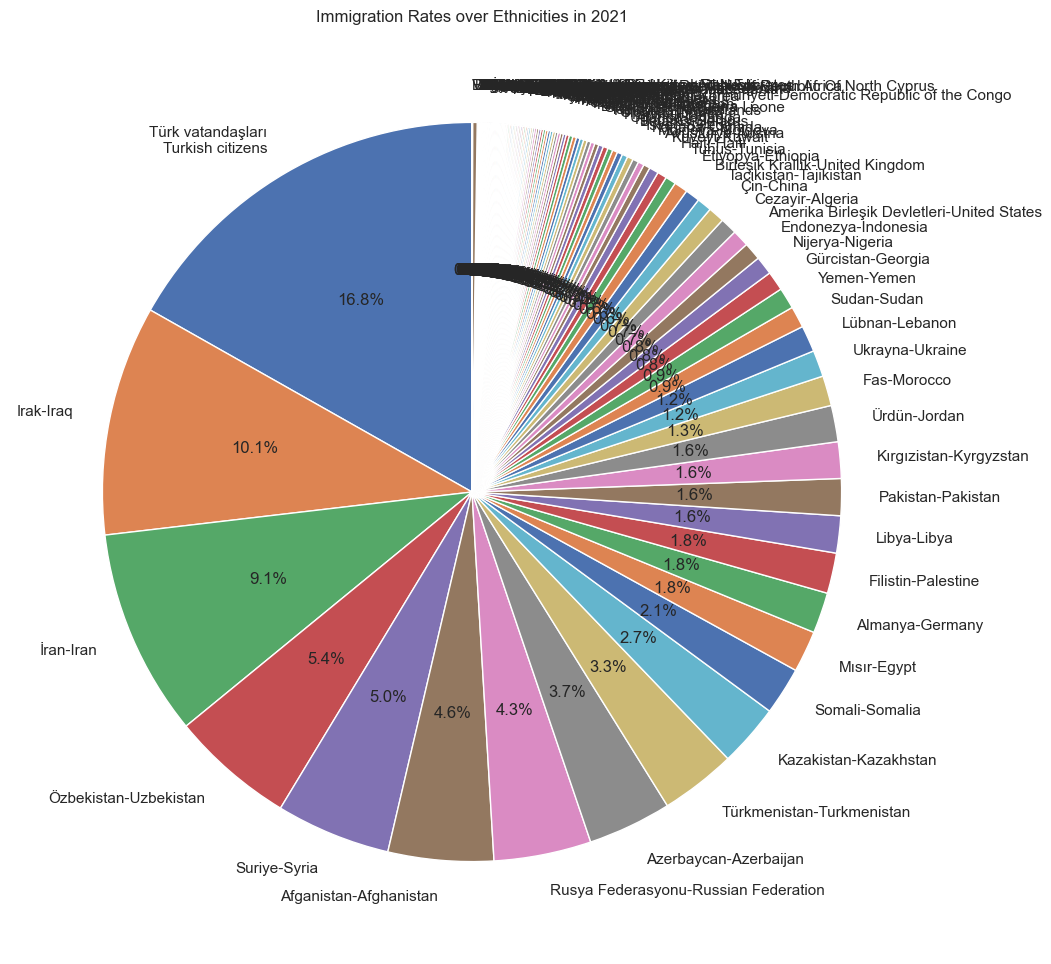

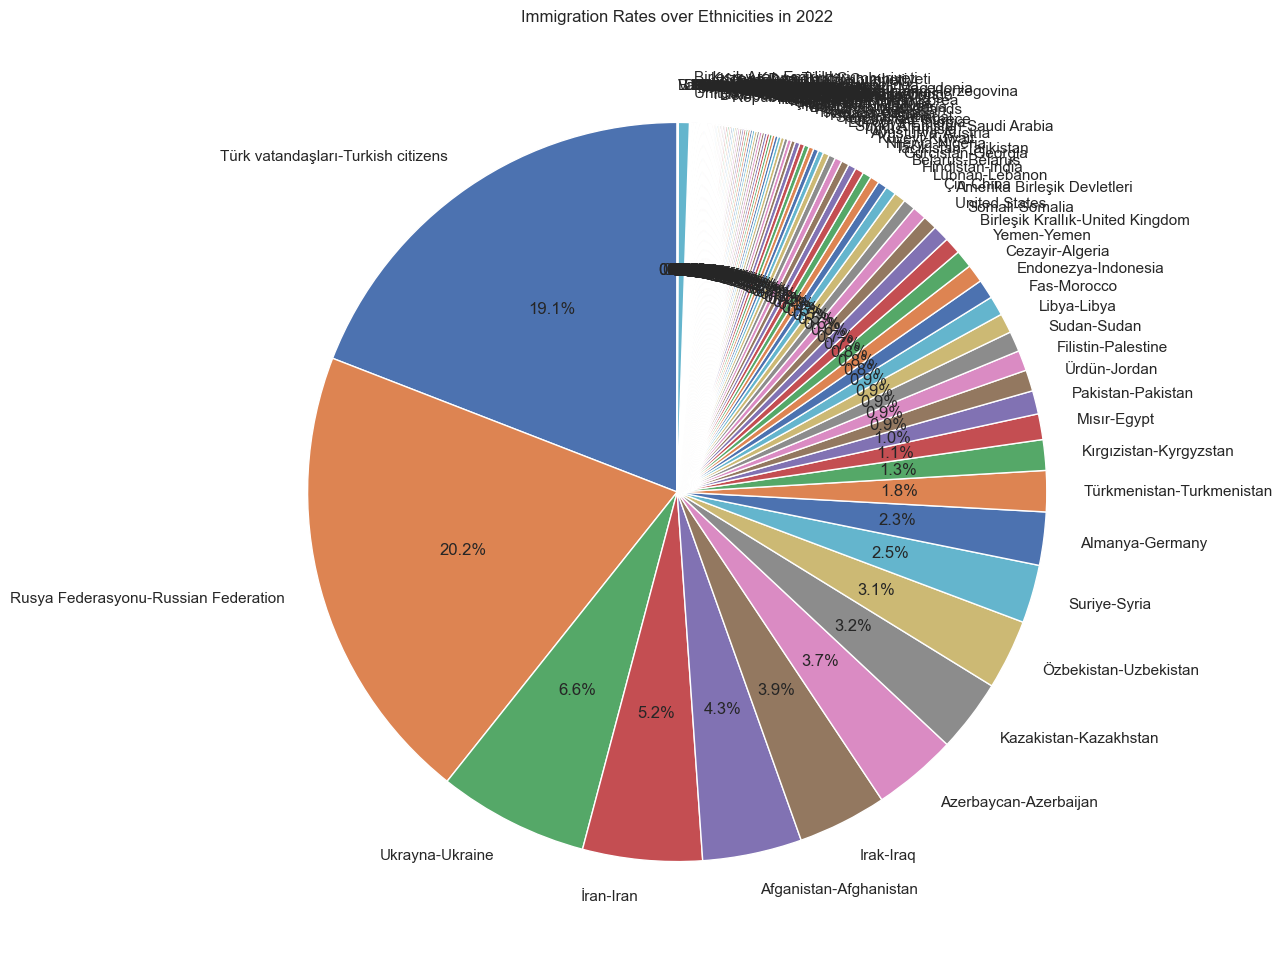

In [14]:
ethnic_immig = pd.read_excel("Immigration over Ethnicity.xls")
for year in range(2016,2023):
    data = ethnic_immig[(ethnic_immig['Year'] == year) & (ethnic_immig['Country of Citizenship'] != 'Toplam-Total') & (ethnic_immig['Country of Citizenship'] != 'Yabancı uyruklular-Foreign nationals')]
    plt.figure(figsize=(15,12))
    plt.pie(data['Total Immigrants'], labels=data['Country of Citizenship'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Immigration Rates over Ethnicities in {str(year)}')

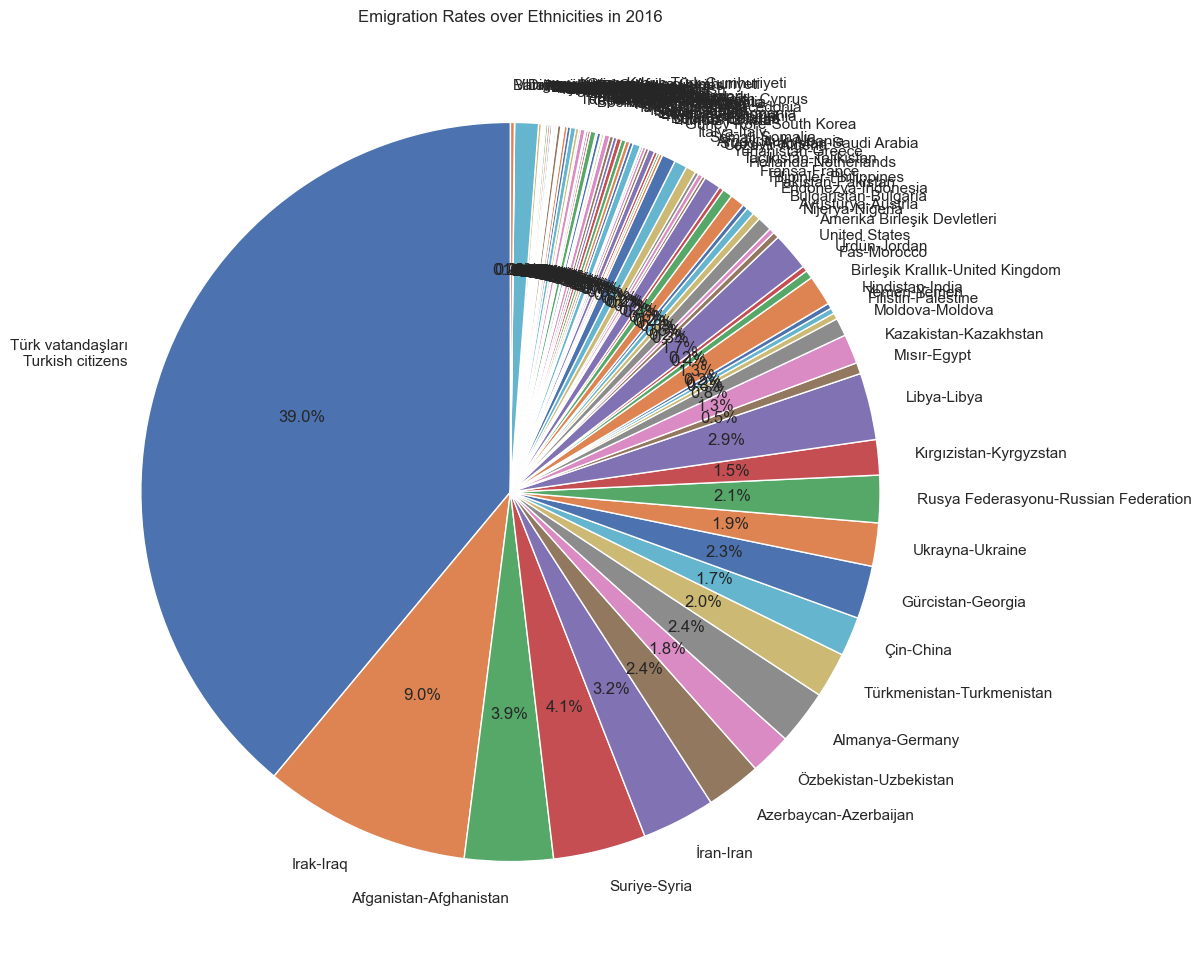

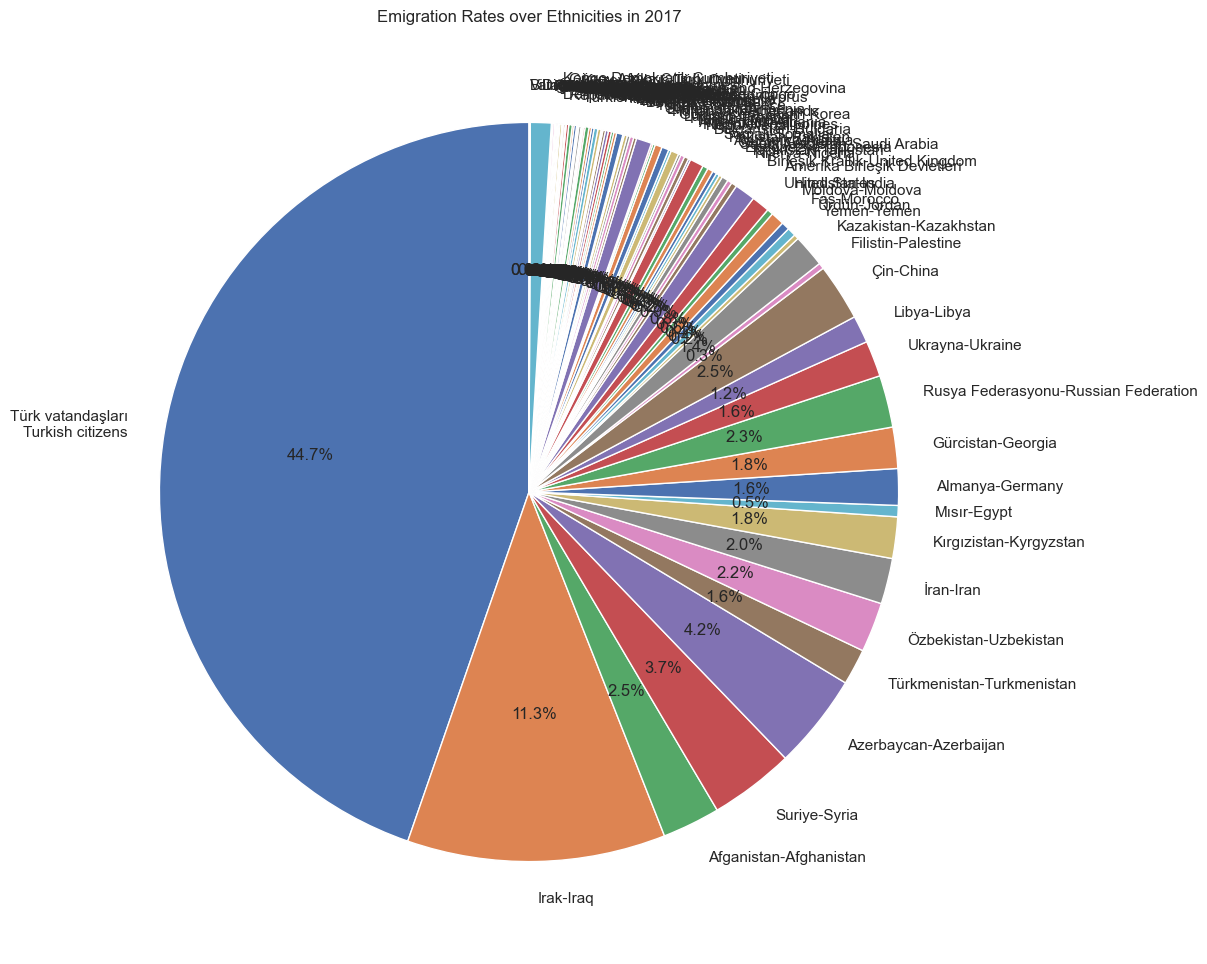

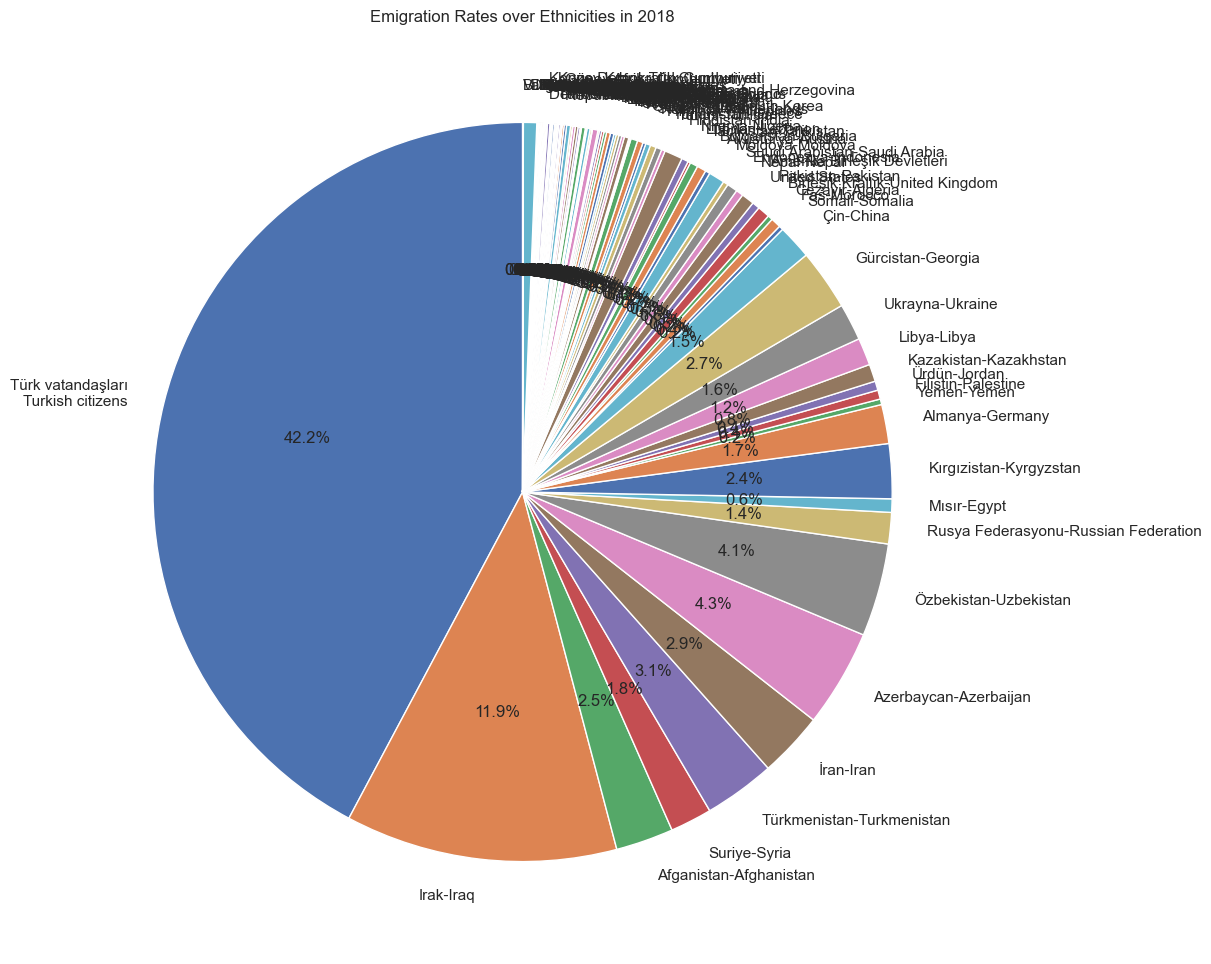

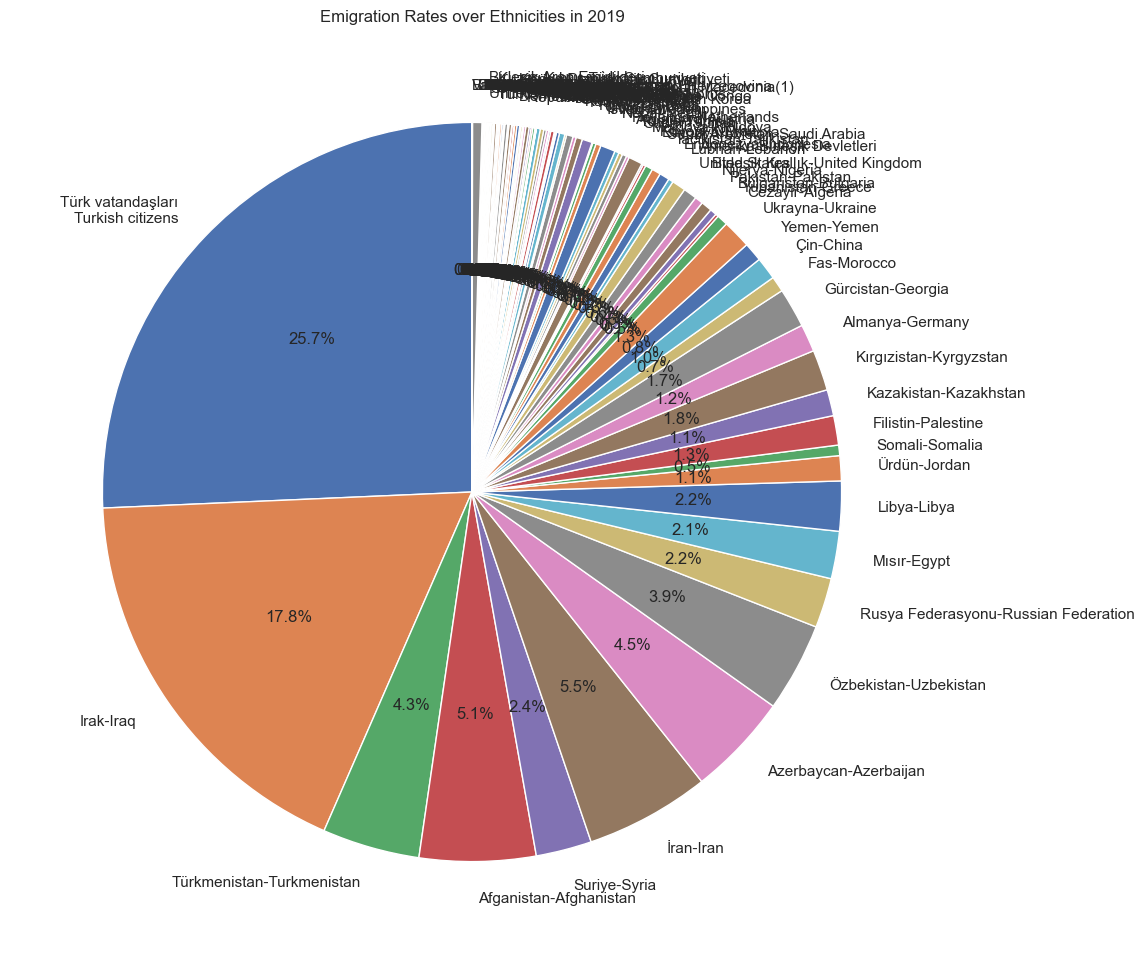

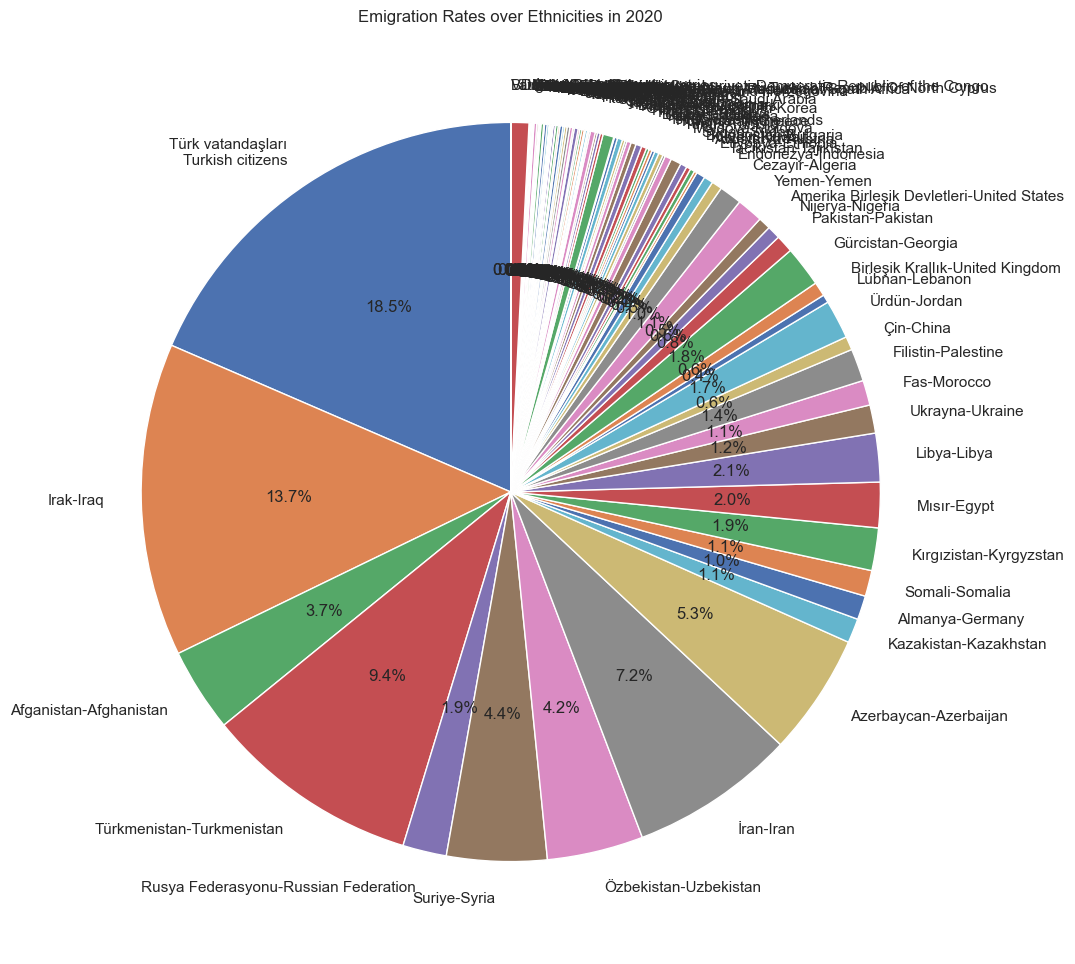

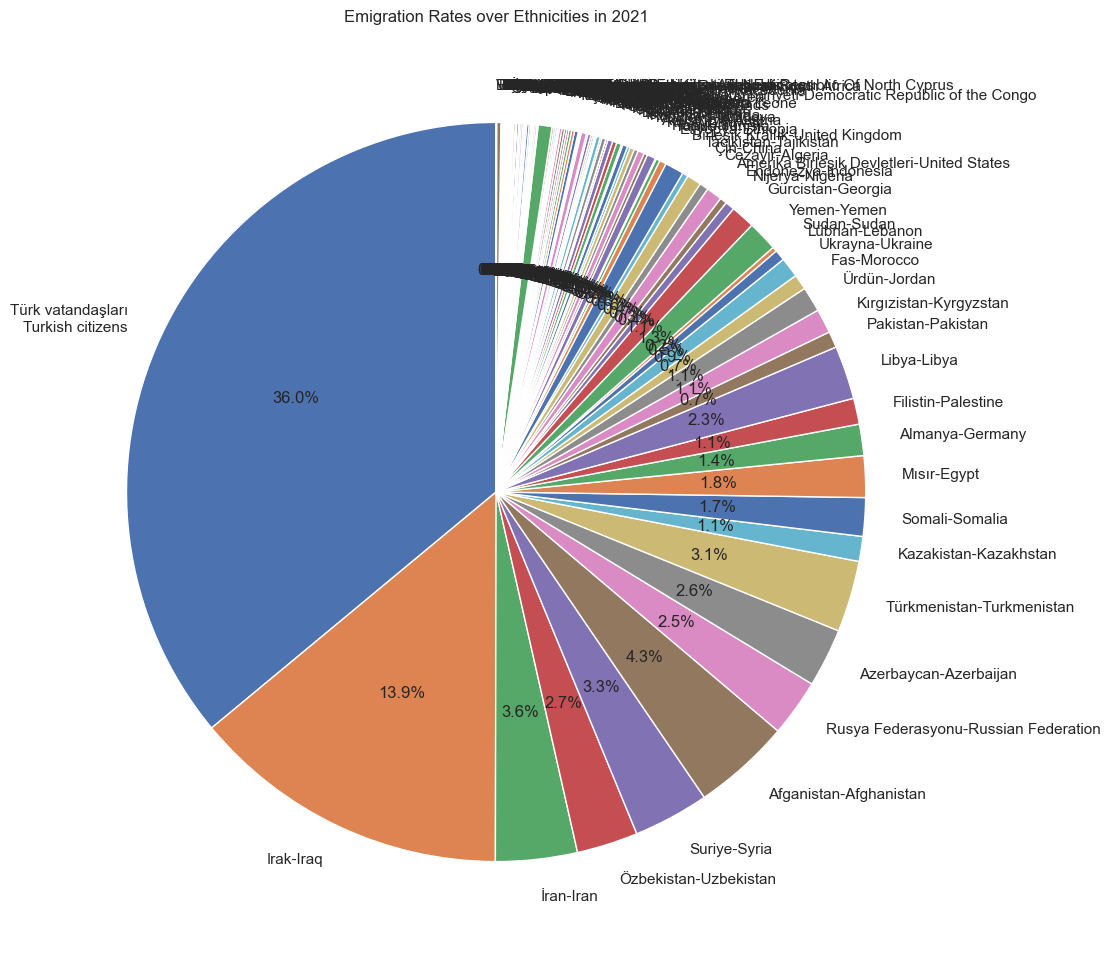

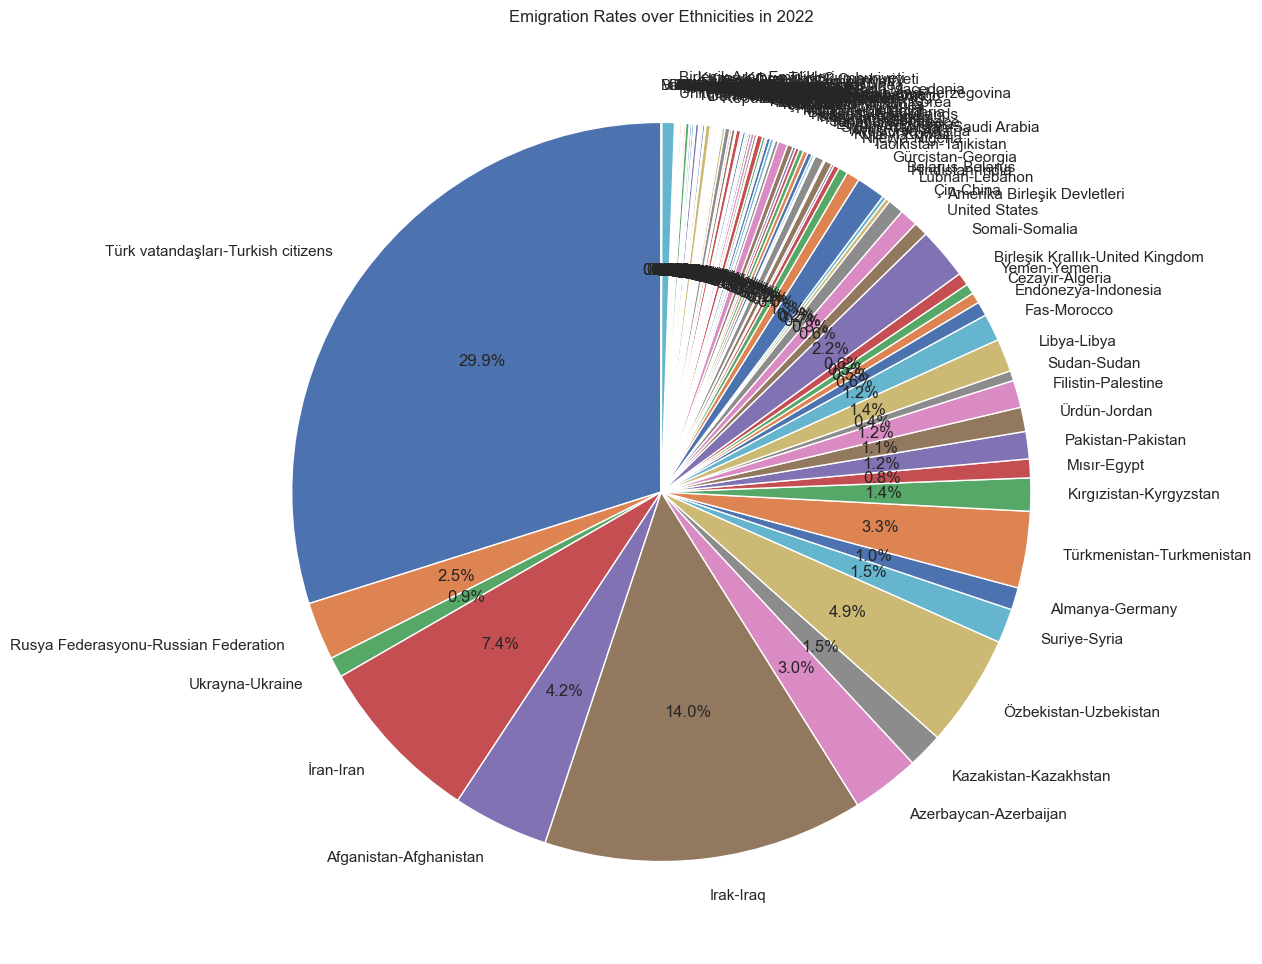

In [15]:
for year in range(2016,2023):
    data = ethnic_immig[(ethnic_immig['Year'] == year) & (ethnic_immig['Country of Citizenship'] != 'Toplam-Total') & (ethnic_immig['Country of Citizenship'] != 'Yabancı uyruklular-Foreign nationals')]
    plt.figure(figsize=(15,12))
    plt.pie(data['Total Emigrants'], labels=data['Country of Citizenship'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Emigration Rates over Ethnicities in {str(year)}')

C:\Users\kırmızı\AppData\Local\Temp\ipykernel_14428\1037799220.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  poverty_melted = pd.melt(poverty, id_vars=['Year', 'Education Level'],


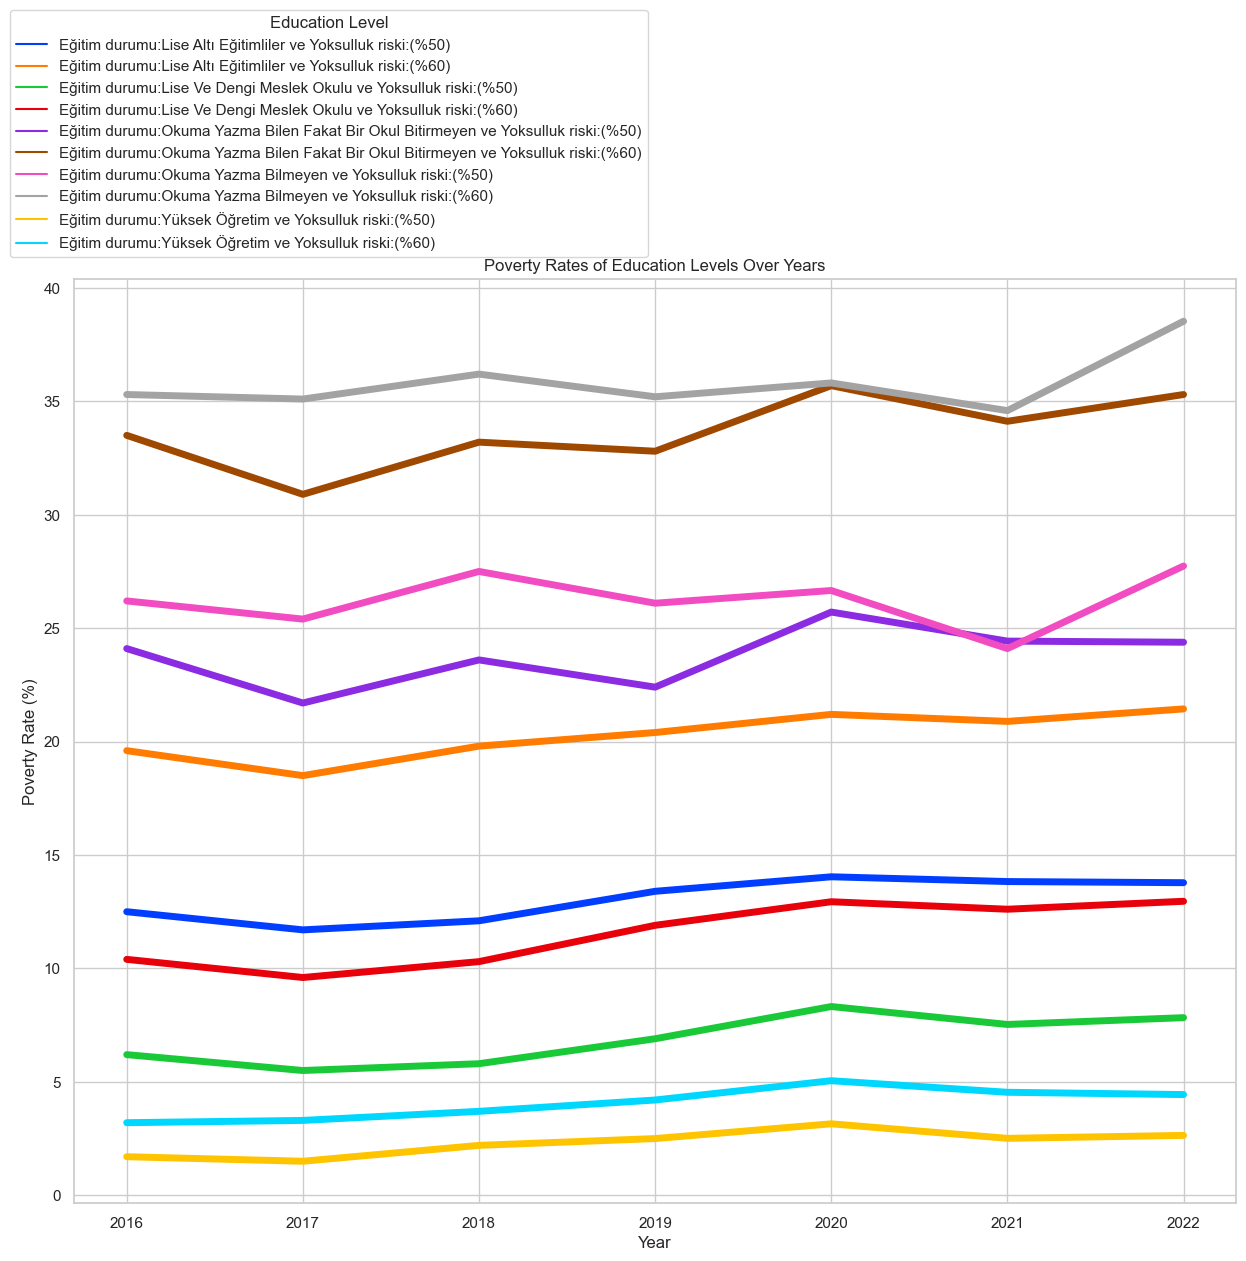

In [16]:
poverty = pd.read_excel("Poverty rates over years.xls")
poverty_melted = pd.melt(poverty, id_vars=['Year', 'Education Level'],
    var_name='Variable', value_name='Poverty Rate')
plt.figure(figsize=(15,12))
ax = sn.lineplot(data=poverty_melted, x='Year', y='Poverty Rate', palette='bright', hue='Education Level')
sn.move_legend(ax, loc='upper right', bbox_to_anchor=(0.5,1.3))
plt.title('Poverty Rates of Education Levels Over Years')
plt.xlabel('Year')
plt.ylabel('Poverty Rate (%)')
for line in plt.gca().lines:
    line.set_linewidth(5)

In [17]:
temp = ethnic_immig[(ethnic_immig['Country of Citizenship'] == 'Türk vatandaşları-Turkish citizens') | (ethnic_immig['Country of Citizenship'] == 'Yabancı uyruklular-Foreign nationals')]
poverty_merged = pd.merge(poverty_melted, temp[['Year','Country of Citizenship','Total Immigrants','Total Emigrants']].drop(1), on='Year')

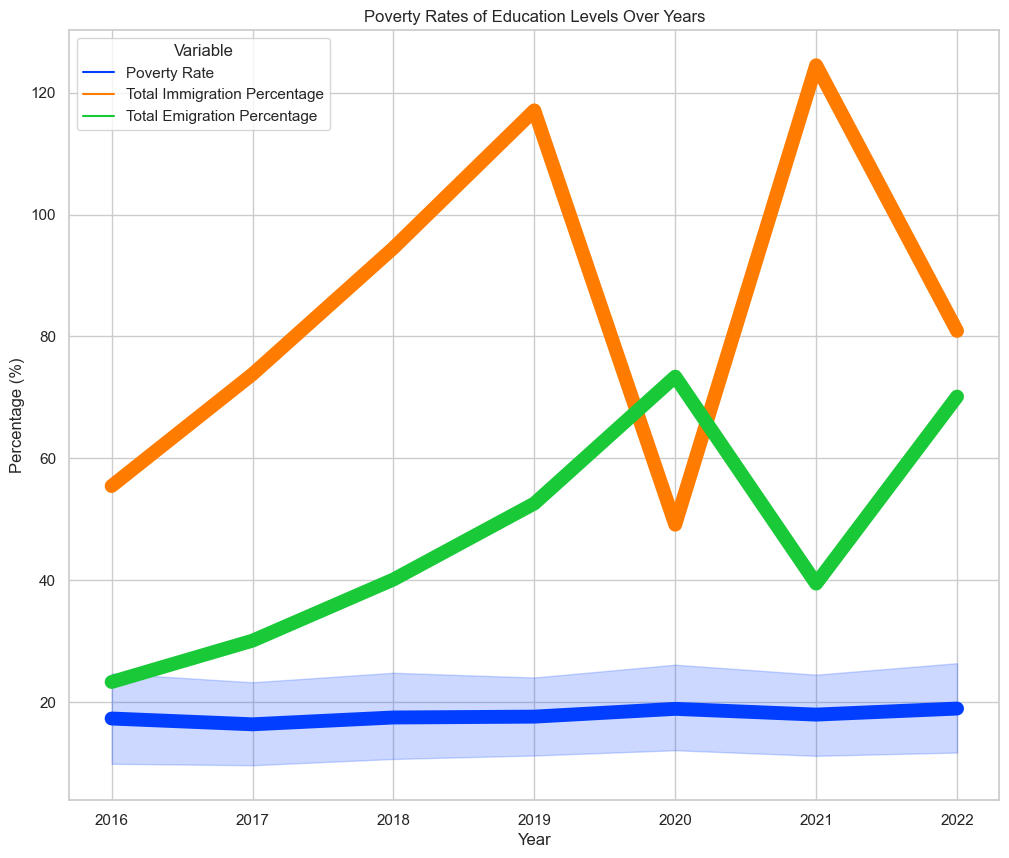

In [18]:
poverty_merged['Total Immigration Percentage'] = (poverty_merged['Total Immigrants'] / 494052.0)*100
poverty_merged['Total Emigration Percentage'] = (poverty_merged['Total Emigrants'] / 466914.0)*100
#poverty_merged.drop('Variable', inplace=True, axis=1)
poverty_mer_mel = pd.melt(poverty_merged, id_vars=['Year', 'Education Level','Country of Citizenship'], value_vars=[
    'Poverty Rate','Total Immigration Percentage','Total Emigration Percentage'], var_name='Variable',
    value_name='Value')
plt.figure(figsize=(12,10))
ax = sn.lineplot(data=poverty_mer_mel, x='Year', y='Value', palette='bright', hue='Variable')
plt.title('Poverty Rates of Education Levels Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
for line in plt.gca().lines:
    line.set_linewidth(10)